# Машинное обучение в бизнесе

## Загрузка и подготовка данных.

### Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
      
RANDOM = 12345
from numpy.random import RandomState
state = RandomState(12345) 

### Загрузка данных

In [2]:
pth1 = '/Users/macbookair13i5/Desktop/datasets/Datasets/ML_in_business/geo_data_0.csv'
pth2 = '/datasets/geo_data_0.csv'
if os.path.exists(pth1):
    df_0 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_0 = pd.read_csv(pth2)
else:
    display('Something is wrong')

pth3 = '/Users/macbookair13i5/Desktop/datasets/Datasets/ML_in_business/geo_data_1.csv'
pth4 = '/datasets/geo_data_1.csv'
if os.path.exists(pth3):
    df_1 = pd.read_csv(pth3)
elif os.path.exists(pth4):
    df_1 = pd.read_csv(pth4)
else:
    display('Something is wrong')

pth5 = '/Users/macbookair13i5/Desktop/datasets/Datasets/ML_in_business/geo_data_2.csv'
pth6 = '/datasets/geo_data_2.csv'

if os.path.exists(pth5):
    df_2 = pd.read_csv(pth5)
elif os.path.exists(pth6):
    df_2 = pd.read_csv(pth6)
else:
    display('Something is wrong')

In [3]:
display(df_0.head(3))
display(df_1.head(3))
display(df_2.head(3))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


### Описание данных

|Название столбца| Описание данных|
|:|:|
|**id**| уникальный идентификатор скважины|
|**f0, f1, f2**| три признака точек (неважно, что они означают, но сами признаки значимы)|
|**product**| объём запасов в скважине (тыс. баррелей)|

### Условия задачи

<div style="border:solid gray 2px; padding: 20px">  
    
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).  
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.  
- Бюджет на разработку скважин в регионе — 10 млрд рублей.  
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.  
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### Проверка пропусков, дубликатов, удаление ненужных столбцов

In [4]:
df_list = [df_0, df_1, df_2]

In [5]:
# Удалим строки с дублтрующимися названиями скважин (их совсем немного)

for df in df_list:
    
    # Удалим столбцы с id никакой информации в них для нас нет
    df = df.drop(columns = 'id', inplace=True)

In [6]:
# Проверим пропуски и количестов явных дубликатов

for df in df_list:
    print(df.info())
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print('-'* 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
Количество дубликатов: 0
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
None
Количество дубликатов: 0
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column  

### Распределение значений. Удаление выбросов


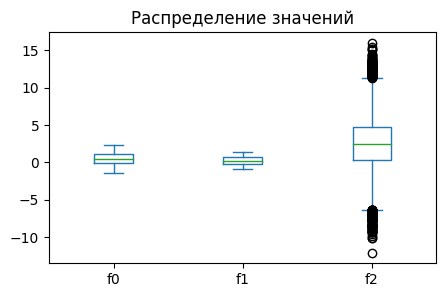

Размер DataFrame: (100000, 4)


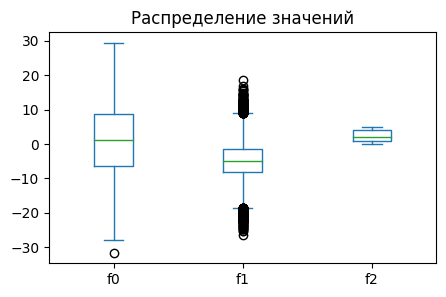

Размер DataFrame: (100000, 4)


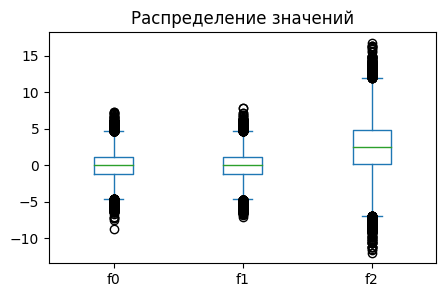

Размер DataFrame: (100000, 4)


In [7]:
# Посмотрим на выбросы в распределении значений

df_list_clear = []

for num, df in enumerate(df_list):
    df[['f0', 'f1', 'f2']].plot(
        kind = 'box',
        title = 'Распределение значений',
        figsize = (5, 3)   
    )
    plt.show()
    size = df.shape
    print(f'Размер DataFrame: {size}')
    
    for col in df:
        #print(df[col])
        
        high_quantile = (df[col].quantile(0.75))
        low_quantile = (df[col].quantile(0.25))
        iqr = high_quantile - low_quantile
        high_treshold = high_quantile + (1.5 * iqr)
        low_treshold = low_quantile - (1.5 * iqr)

### Взаимосвязь признаков

In [8]:
for num, df in enumerate(df_list_clear):
    print()
    print(f'Регион: {num}')
    display(df.corr())

В регионе 1 прослеживается очень высокая положительная свзяь f2 и product!  
столбец f2 в данных первого региона нужно удалить, иначе модель выдаст значение r2 близкое к 1!

### Разделение данных на обучающую и валидационную выборки в соотношении 75:25.

In [9]:
# Обучающая и валидационная выборки

df_train_list = []
df_valid_list = []

for num, df in enumerate(df_list):
    df_train, df_valid = train_test_split(df, test_size = 0.25, random_state = RANDOM)
    df_train_list.append(df_train)
    df_valid_list.append(df_valid)
    
df_0_train, df_0_valid = df_train_list[0], df_valid_list[0]
df_1_train, df_1_valid = df_train_list[1], df_valid_list[1]
df_2_train, df_2_valid = df_train_list[2], df_valid_list[2]

# Поместим в списки
train_list = [df_0_train, df_1_train, df_2_train]
valid_list = [df_0_valid, df_1_valid, df_2_valid]

### Выделение Признаков и Целевого признака

In [10]:
# Признаки обучающих данных

features_train_list = []
target_train_list = []
target_mean_list = []

for num, frame in enumerate(train_list):
    features = frame.drop('product', axis=1)
    target = frame['product']
    features_train_list.append(features)
    target_train_list.append(target)
    target_mean_list.append(target.mean()) # Пригодится позднее (Средний объем сырья в регионе)
    print(f'Регион {num}:')
    print(f'Размер признаков: {features.shape}')
    print(f'Размер целевого признака{target.shape}')  
    print()

Регион 0:
Размер признаков: (75000, 3)
Размер целевого признака(75000,)

Регион 1:
Размер признаков: (75000, 3)
Размер целевого признака(75000,)

Регион 2:
Размер признаков: (75000, 3)
Размер целевого признака(75000,)



In [11]:
# Признаки тестовых данных

features_valid_list = []
target_valid_list = []

for frame in valid_list:
    features = frame.drop('product', axis=1)
    target = frame['product']
    features_valid_list.append(features)
    target_valid_list.append(target)

### Масштабирование обучающих данных

In [12]:
# Используем StandardScaler

scaler = StandardScaler()
#features_scaled_train_list = []

for num, i in enumerate(features_train_list):
    scaler.fit(i)
    i = pd.DataFrame(scaler.transform(i), index = i.index, columns = i.columns)
    features_train_list[num] = i
    #features_scaled_train_list.append(i)
    features_valid_list[num] = pd.DataFrame(scaler.transform(features_valid_list[num]), index = features_valid_list[num].index, columns = features_valid_list[num].columns)

---

## Обучение и проверка модели для каждого региона.

По условию проекта для обучения модели подходит только линейная регрессия

### Обучение модели. Предсказания и правильные ответы на валидационной выборке.

In [13]:
# Обучение модели

model_list = []
for num, features in enumerate(features_train_list):
    model = LinearRegression()
    model.fit(features, target_train_list[num])
    
    model_list.append(model)
    
# Проведем перекрестную проверку
    scores = cross_val_score(model, features, target_train_list[num])
    cv_score = sum(scores)/len(scores)
    print(f'r2: {cv_score}')

r2: 0.2740865337100073
r2: 0.9996246813972828
r2: 0.19648225543040276


Лучшее значение r2 в модели Первого региона!  
В первом регионе модель работает так же как и среднее

In [14]:
# Предсказания на валидационной выборке

prediction_list = []
rmse_list = []
best_name = 0
best_score = 0
best_RMSE = 100000
best_MAE = 100

for num, model in enumerate(model_list):
    if num == 0:
        name = 'Регион 0'
    elif num == 1:
        name = 'Регион 1'
    elif num == 2:
        name = 'Регион 2'
    
    # Предсказания
    predictions_valid = model.predict(features_valid_list[num])
    prediction_list.append(pd.Series(predictions_valid))

    
    # R2
    score = r2_score(target_valid_list[num], predictions_valid)
    if score > best_score:
        best_score = score
        best_model = model
        best_name = name
    print(f'r2 модели: {score}')
    
    # MSE и RMSE
    mse = mean_squared_error(target_valid_list[num], predictions_valid)
    rmse = mse ** .5
    rmse_list.append(rmse)
    if rmse < best_RMSE:
        best_RMSE = rmse
        name_rmse = name
    print(f'RMSE модели: {rmse}')
    
    
    # MAE
    MAE = mean_absolute_error(target_valid_list[num], predictions_valid)
    if MAE < best_MAE:
        best_MAE = MAE
        name_mae = name
    print(f'MAE: {MAE}')
    print()
    
print('-'*25)    
print(f'Лучшее r2 - {best_name}: {best_score}')
print(f'Минимальное RMSE - {name_rmse}: {best_RMSE}')
print(f'Минимальное MAE - {name_mae}: {best_MAE}')

r2 модели: 0.27994321524487786
RMSE модели: 37.5794217150813
MAE: 30.919600777151313

r2 модели: 0.9996233978805127
RMSE модели: 0.893099286775617
MAE: 0.7187662442124758

r2 модели: 0.20524758386040443
RMSE модели: 40.02970873393434
MAE: 32.792652105481814

-------------------------
Лучшее r2 - Регион 1: 0.9996233978805127
Минимальное RMSE - Регион 1: 0.893099286775617
Минимальное MAE - Регион 1: 0.7187662442124758


### Cредний запас предсказанного сырья и RMSE модели.

In [15]:
best_pred_mean = 1
best_num = 0

for num, predict in enumerate(prediction_list):
    print(f'Регион {num}:')
    print(f'Средний объем сырья (Фактический): {target_mean_list[num]} тыс. баррелей')
    print(f'Средний запас сырья (Предсказанный): {predict.mean()} тыс. баррелей')
    print(f'RMSE модели: {rmse_list[num]}')
    print()
    if predict.mean() > best_pred_mean:
        best_pred_mean = predict.mean()
        best_num = num
    
print('-'*25)
print(f'Наибольшее среднее значение предсказанного сырья {best_pred_mean} тыс. баррелей, Регион {best_num}')

Регион 0:
Средний объем сырья (Фактический): 92.64046775305692 тыс. баррелей
Средний запас сырья (Предсказанный): 92.59256778438035 тыс. баррелей
RMSE модели: 37.5794217150813

Регион 1:
Средний объем сырья (Фактический): 68.85895465854666 тыс. баррелей
Средний запас сырья (Предсказанный): 68.728546895446 тыс. баррелей
RMSE модели: 0.893099286775617

Регион 2:
Средний объем сырья (Фактический): 95.03858906371522 тыс. баррелей
Средний запас сырья (Предсказанный): 94.96504596800489 тыс. баррелей
RMSE модели: 40.02970873393434

-------------------------
Наибольшее среднее значение предсказанного сырья 94.96504596800489 тыс. баррелей, Регион 2


### Анализ результатов.

Cреднние объемы сырья в каждом регионе в предсказаниях и в целевом признаке практичеки одинаковые.  
В регионах 0 и 2 средний объем сырья - достигают высших значений.  
Значение r2 самое высокое у нулевого региона, MAE и RMSE самое минимальное.

---

## Расчет прибыли

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.  

- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

### Сохранение всех ключевых рассчетов в отдельных переменных

In [16]:
# Общий бюджет
BUDGET = 10**10

# Цена 1тыс. баррелей
PRICE = 450000

# Количество точек для изучения
NUM_POINTS = 500

# Количество точек для разработки
NUM_BEST_POINTS = 200

# Бюджет на одну скважину
BUDGET_POINT = BUDGET/NUM_BEST_POINTS

### Рассчет объёма сырья, достаточного для безубыточной разработки новой скважины. Сравнение полученного объёма сырья со средним запасом в каждом регионе.

In [17]:
# Количество сырья для разработки без убытка (тыс.баррелей)

LOSLESS = round(BUDGET_POINT/PRICE)
print(f'Количество сырья для безубыточной разработки: {LOSLESS} тыс. баррелей')

Количество сырья для безубыточной разработки: 111 тыс. баррелей


In [18]:
# Сравним объем сырья для безубыточной разработки скважины со средним запасом в каждом регионе

for num, mean in enumerate(target_mean_list):
    print(f'Регион {num}:')
    if mean > LOSLESS:
        print(f'Средний запас в регионе больше безубыточного на {mean - LOSLESS}')
    else:
        print((f'Средний запас в регионе меньше безубыточного на {LOSLESS - mean} тыс.баррелей'))
    print()

Регион 0:
Средний запас в регионе меньше безубыточного на 18.359532246943076 тыс.баррелей

Регион 1:
Средний запас в регионе меньше безубыточного на 42.141045341453335 тыс.баррелей

Регион 2:
Средний запас в регионе меньше безубыточного на 15.961410936284778 тыс.баррелей



### Выводы по этапу подготовки расчёта прибыли.

**Произвели рассчет:**  
- финансирование одной скважины (50 млн.р)  
- объем сырья для безубыточной разработки (111 тыс. баррелей)  
  
  На основании этих рассчетов очевидно, что необходимо искать наиболее богатые месторождения в регионе, потому что средний показатель объема сырья по регионам не превышает объем для безубыточной разработки.

---

## Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели:

### Выбор скважины с максимальными значениями предсказаний.

Регион 0


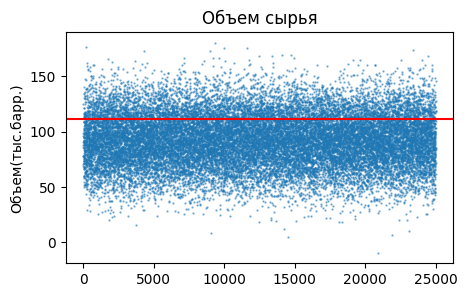

Средний объем сырья в лучших скважинах: 155.511654194057 тыс. баррелей

Регион 1


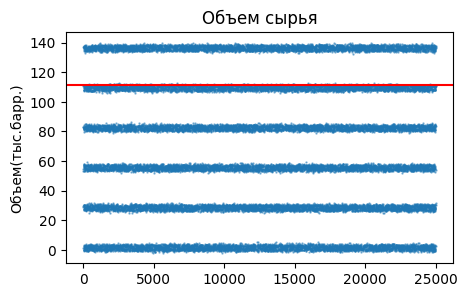

Средний объем сырья в лучших скважинах: 138.73013391081716 тыс. баррелей

Регион 2


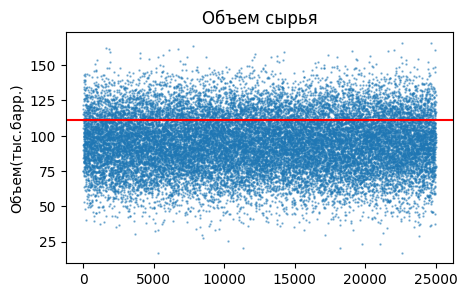

Средний объем сырья в лучших скважинах: 148.01949329159177 тыс. баррелей



In [19]:
# Посмотрим на распределение значений в предсказаниях.

losless_points = []
best_points = []

for num, predict in enumerate(prediction_list):
    print(f'Регион {num}')
    
    fig,ax = plt.subplots(figsize = (5,3))
    plt.scatter(np.arange(len(predict)), predict, s = 0.5, alpha=0.5)
    ax.set_title('Объем сырья')
    ax.set_ylabel('Объем(тыс.барр.)')
    ax.set_label('Количество скважин')

    # Граница безубыточности
    plt.axhline(LOSLESS, color = 'red')
    plt.show()
    
    # Отсортируем значения предсказаний объема сырья
    predict = np.sort(predict)
    best_points.append(predict[-NUM_BEST_POINTS:])
    

    print(f'Средний объем сырья в лучших скважинах: {best_points[num].mean()} тыс. баррелей')
    print()

Все Регионы подходят для разработки!

### Суммарное целевое значение объёма сырья, соответствующее максимальным значениям предсказаний.

In [20]:
# Сравним значения объема сырья (валидационная выборка)

for num, target in enumerate(target_valid_list):
    print(f'Регион {num}:')
    print(f'Суммарное целевое значение {sum(target)} тыс. баррелей')
    print(f'Суммарное значение предсказаний объема: {sum(prediction_list[num])} тыс. баррелей')
    print()
    

Регион 0:
Суммарное целевое значение 2301964.918520735 тыс. баррелей
Суммарное значение предсказаний объема: 2314814.194609502 тыс. баррелей

Регион 1:
Суммарное целевое значение 1718078.4006093733 тыс. баррелей
Суммарное значение предсказаний объема: 1718213.672386145 тыс. баррелей

Регион 2:
Суммарное целевое значение 2372105.8202213724 тыс. баррелей
Суммарное значение предсказаний объема: 2374126.1492001265 тыс. баррелей



### Рассчет прибыли для полученного объёма сырья.

In [21]:
# Функция рассчета прибыли

def income (target, predictions):
    sort_pred = pd.Series(predictions).sort_values(ascending=False)[:NUM_BEST_POINTS]
    sort_target = target.reset_index(drop=True)[sort_pred.index]
    sum_target = sort_target.sum()
    
    return round(sum_target * PRICE - BUDGET)

In [22]:
# Значения прибыли в регионах

for num, targ in enumerate(target_valid_list):
    print(f'Регион {num}, Прибыль: {income(targ, prediction_list[num])} тыс.руб')

Регион 0, Прибыль: 3320826043 тыс.руб
Регион 1, Прибыль: 2415086697 тыс.руб
Регион 2, Прибыль: 2710349964 тыс.руб


Все Регионы подходят для разработки

---

## Рассчет рисков и прибыли для каждого региона.

### Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [23]:
# Функция расчета доверительного интервала (для 500 скважин)

def confidence_interval(target,pred):
    samples = []
    
    # Бутстреп
    for i in range(1000):
        sample = pd.Series(pred).sample(n = NUM_POINTS, replace=True, random_state=state)
        samples.append(income(target,sample))
    samples = pd.Series(samples)
    print(f'Средняя Прибыль {samples.mean()}')
    print(f'Риск убытка: {(samples.values < 0).mean()*100} %')
    
    lower = samples.quantile(0.025)
    upper = samples.quantile(0.975)
    return round(lower,2), round(upper,2)

### Поиск средней прибыли, 95%-го доверительного интервала и риска убытков (отрицательная прибыль).

In [24]:
for num, sample in enumerate(target_valid_list):
    
    print(f'Регион {num}')
    print(f'95% Доверительный интервал: {confidence_interval(sample, pd.Series(prediction_list[num]))}')
    print()

Регион 0
Средняя Прибыль 396164984.807
Риск убытка: 6.9 %
95% Доверительный интервал: (-111215545.6, 909766941.5)

Регион 1
Средняя Прибыль 461155817.281
Риск убытка: 0.7000000000000001 %
95% Доверительный интервал: (78050810.35, 862952060.0)

Регион 2
Средняя Прибыль 392950475.171
Риск убытка: 6.5 %
95% Доверительный интервал: (-112227625.75, 934562914.7)



### Выводы: Предложение региона для разработки скважин и обоснование.

<div style="border:solid gray 2px; padding: 20px">  
    
- **Регион 1** больше всего подходит для разработки!  
    Риск убытка 1.3% (Подходит по условиям проекта)  
    Доверительный интервал лежит между положительными значениями прибыли.  
    Средняя прибыль выше других по регионам.
  
- Для разаработки сважин также может подойти регион **0**, но уровень риска убытков 5,7%.  
    Также максимальный значения прибыли превышают максимальные значения в регионе 1
    
- Регион 2 - самый высокий риск отрицательной прибыли

    
- **Предложение для разработки:**.  
    
Регион 1 более других подхоит для дальнейшей разработки!  
    Также можно рассмотреть возможность разработки самых ресурсных скважин и в регионе 0